# UNSUPERVISED LEARNING PRACTICE

In [1]:
# !pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357285 sha256=445a1376c562ba273cfa14ff276776213084f4f734e893f4e5a66f4b0b46af7a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
from IPython.display import HTML
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
# from surprise import Dataset, Reader, KNNBasic
# from surprise.model_selection import train_test_split
# from surprise import accuracy
# from surprise.model_selection import GridSearchCV

## KMeans Clustering
K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster (W3School).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
kmeans_df = pd.read_csv('/content/drive/MyDrive/Personal DS Project/KMeans Clustering/mall_customers.csv')
kmeans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
kmeans_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
kmeans_df['Gender'] = np.where(kmeans_df['Gender']=='Female', 1,0)

In [7]:
kmeans_df.duplicated().value_counts()

,count
False,200


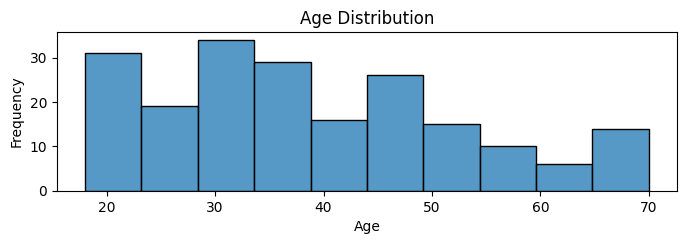

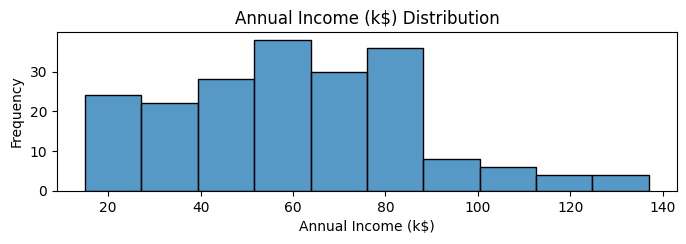

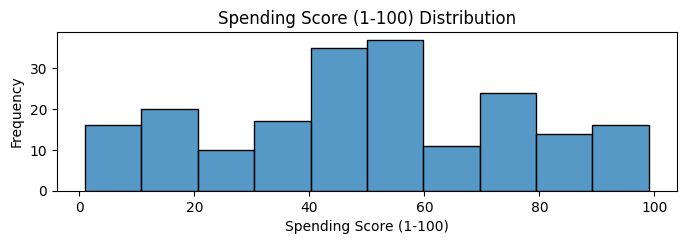

In [8]:
num_var = kmeans_df.select_dtypes(include=np.number).columns.tolist()
del num_var[0:2]

for i, var in enumerate(num_var, start=1):
  plt.figure(figsize=(8,7))
  plt.subplot(3,1,i)
  sns.histplot(kmeans_df[var], bins=10)
  plt.xlabel(var)
  plt.ylabel('Frequency')
  plt.title(f'{var} Distribution')

plt.show()

In [9]:
kmeans_df.describe([0.1,0.25,0.75,0.95,0.99])

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
10%,20.900000,0.000000,21.000000,23.900000,13.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
95%,190.050000,1.000000,66.050000,103.000000,92.000000
99%,198.010000,1.000000,69.010000,126.110000,97.010000


In [10]:
kmeans_df['Annual Income (k$)'] = pd.cut(kmeans_df['Annual Income (k$)'], bins=[10,41.5,103,137], labels=['Low Income', 'Middle Income', 'High Income']).astype('category')
kmeans_df['Spending Score (1-100)'] = pd.cut(kmeans_df['Spending Score (1-100)'], bins=[1,34.75,73,99], labels=['Low Spending', 'Middle Spending', 'High Spending']).astype('category')
# kmeans_df['Age'] = pd.cut(kmeans_df['Age'], bins=[15,30,45,60,75], labels=['15-30', '31-45', '46-60','61-75']).astype('category')

In [11]:
kmeans_df.drop(columns=['CustomerID'], inplace=True)

In [12]:
kmeans_df.pivot_table(index='Annual Income (k$)', columns='Spending Score (1-100)', values='Gender', aggfunc='count')

Spending Score (1-100),Low Spending,Middle Spending,High Spending
Annual Income (k$),,,
Low Income,17,19,14
Middle Income,27,86,27
High Income,4,0,4


In [13]:
# kmeans_df['Segment'] = np.where((kmeans_df['Annual Income (k$)']=='Low Income') & (kmeans_df['Spending Score (1-100)']=='Low Spending'), 'Budget-Concious',
#                                 np.where((kmeans_df['Annual Income (k$)']=='Low Income') & (kmeans_df['Spending Score (1-100)']=='Middle Spending'), 'Moderate Spenders',
#                                          np.where((kmeans_df['Annual Income (k$)']=='Low Income') & (kmeans_df['Spending Score (1-100)']=='High Spending'), 'High Potential (L)',
#                                                   np.where((kmeans_df['Annual Income (k$)']=='Middle Income') & (kmeans_df['Spending Score (1-100)']=='Low Spending'), 'Savvy Savers',
#                                                            np.where((kmeans_df['Annual Income (k$)']=='Middle Income') & (kmeans_df['Spending Score (1-100)']=='Middle Spending'), 'Mainstream Spenders',
#                                                                     np.where((kmeans_df['Annual Income (k$)']=='Middle Income') & (kmeans_df['Spending Score (1-100)']=='High Spending'), 'High Potential (M)',
#                                                                              np.where((kmeans_df['Annual Income (k$)']=='High Income') & (kmeans_df['Spending Score (1-100)']=='Low Spending'), 'Wealthy Savers',
#                                                                                       np.where((kmeans_df['Annual Income (k$)']=='High Income') & (kmeans_df['Spending Score (1-100)']=='Middle Spending'), 'Comfortable Spenders',
#                                                                                                np.where((kmeans_df['Annual Income (k$)']=='High Income') & (kmeans_df['Spending Score (1-100)']=='High Spending'), 'High Potential (H)', 'Unknown')))))))))


In [15]:
# kmeans_df['Segment'] = kmeans_df['Segment'].astype('category')

In [16]:
kmeans_data = pd.get_dummies(kmeans_df)

In [17]:
kmeans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Gender                                  200 non-null    int64
 1   Age                                     200 non-null    int64
 2   Annual Income (k$)_Low Income           200 non-null    bool 
 3   Annual Income (k$)_Middle Income        200 non-null    bool 
 4   Annual Income (k$)_High Income          200 non-null    bool 
 5   Spending Score (1-100)_Low Spending     200 non-null    bool 
 6   Spending Score (1-100)_Middle Spending  200 non-null    bool 
 7   Spending Score (1-100)_High Spending    200 non-null    bool 
dtypes: bool(6), int64(2)
memory usage: 4.4 KB


In [18]:
kmeans_data.drop(columns=['Annual Income (k$)_Low Income','Spending Score (1-100)_Low Spending'], inplace=True)

In [19]:
from sklearn.cluster import KMeans

In [20]:
# Menghitung inertia untuk berbagai jumlah cluster
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(kmeans_data)
    inertia.append(kmeans.inertia_)

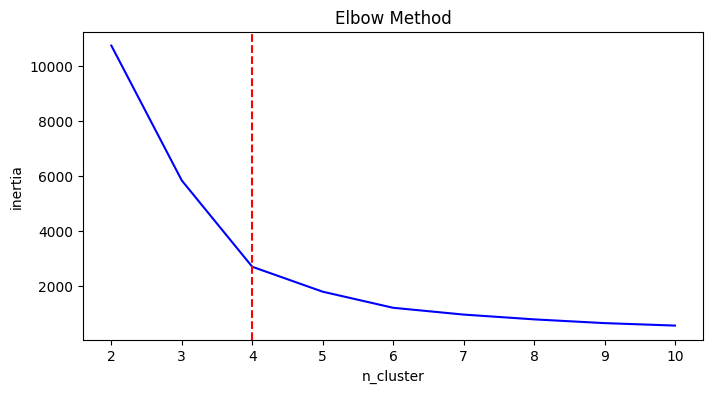

In [21]:
# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, c='b')
plt.axvline(4, linestyle='--', c='r')
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()

In [22]:
optimal_clusters = 4

# Membuat model KMeans dengan jumlah cluster optimal dan melakukan klustering
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_optimal.fit(kmeans_data)
# Memprediksi setiap klaster untuk setiap customer
kmeans_df['cluster_kmeans'] = kmeans_optimal.predict(kmeans_data)

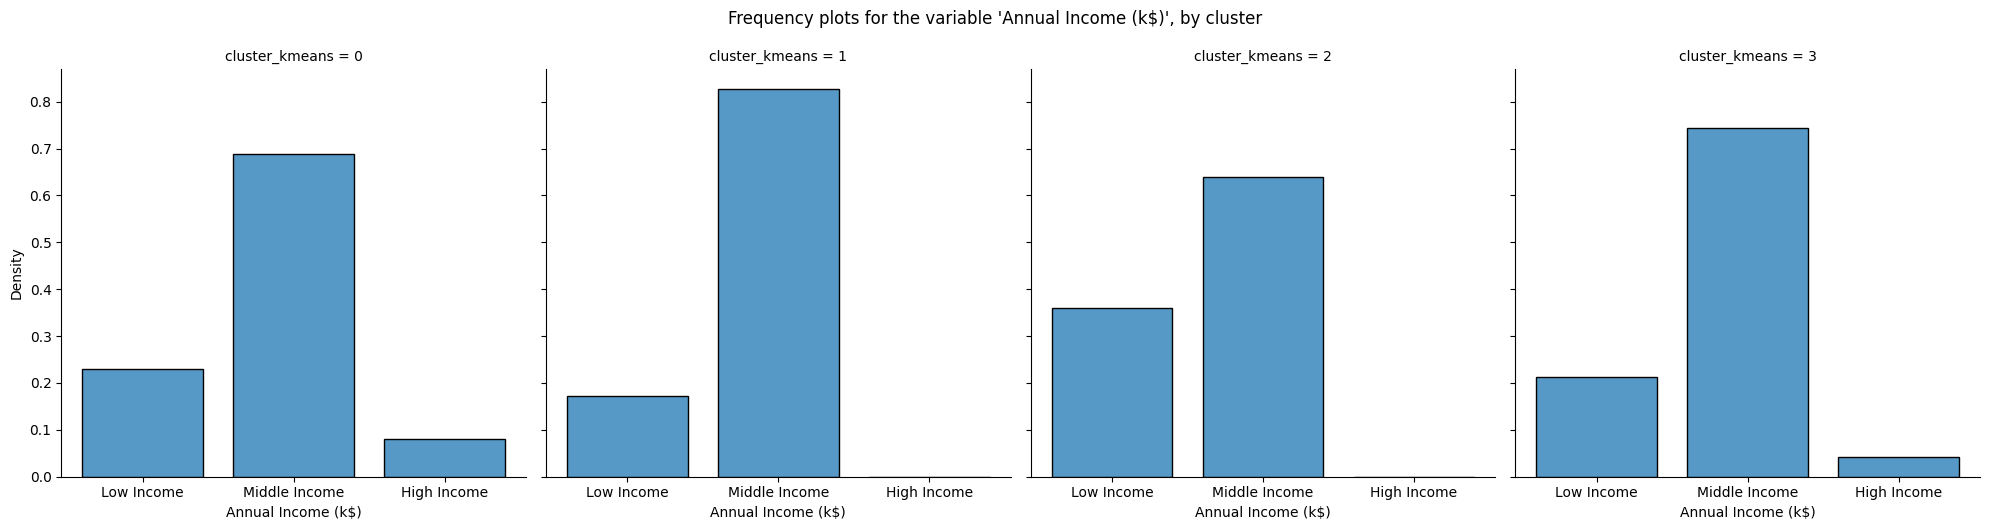

In [23]:
g = sns.displot(data=kmeans_df,
                x='Annual Income (k$)',
                col='cluster_kmeans',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'Annual Income (k$)', by cluster", y=1.05)

plt.show()

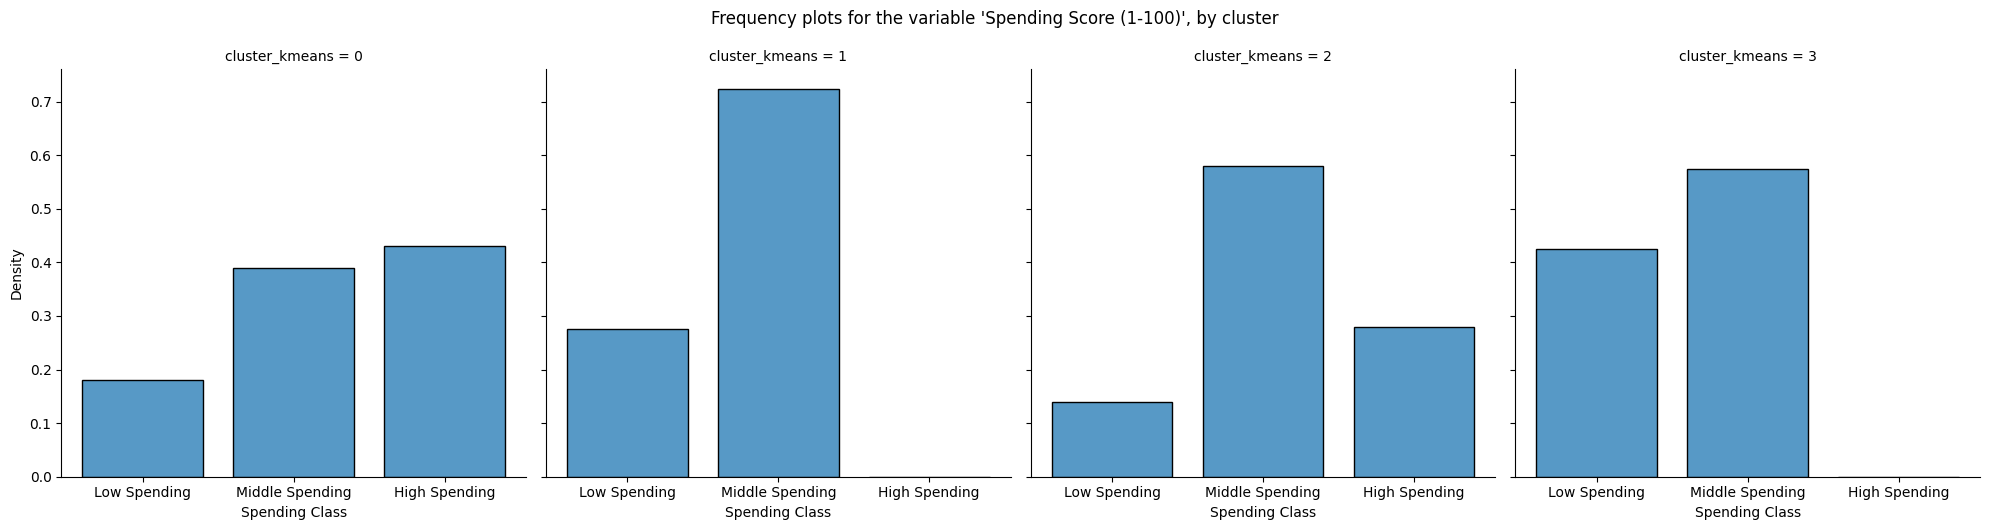

In [24]:
g = sns.displot(data=kmeans_df,
                x='Spending Score (1-100)',
                col='cluster_kmeans',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.set_xlabels('Spending Class')
g.fig.suptitle("Frequency plots for the variable 'Spending Score (1-100)', by cluster", y=1.05)

plt.show()

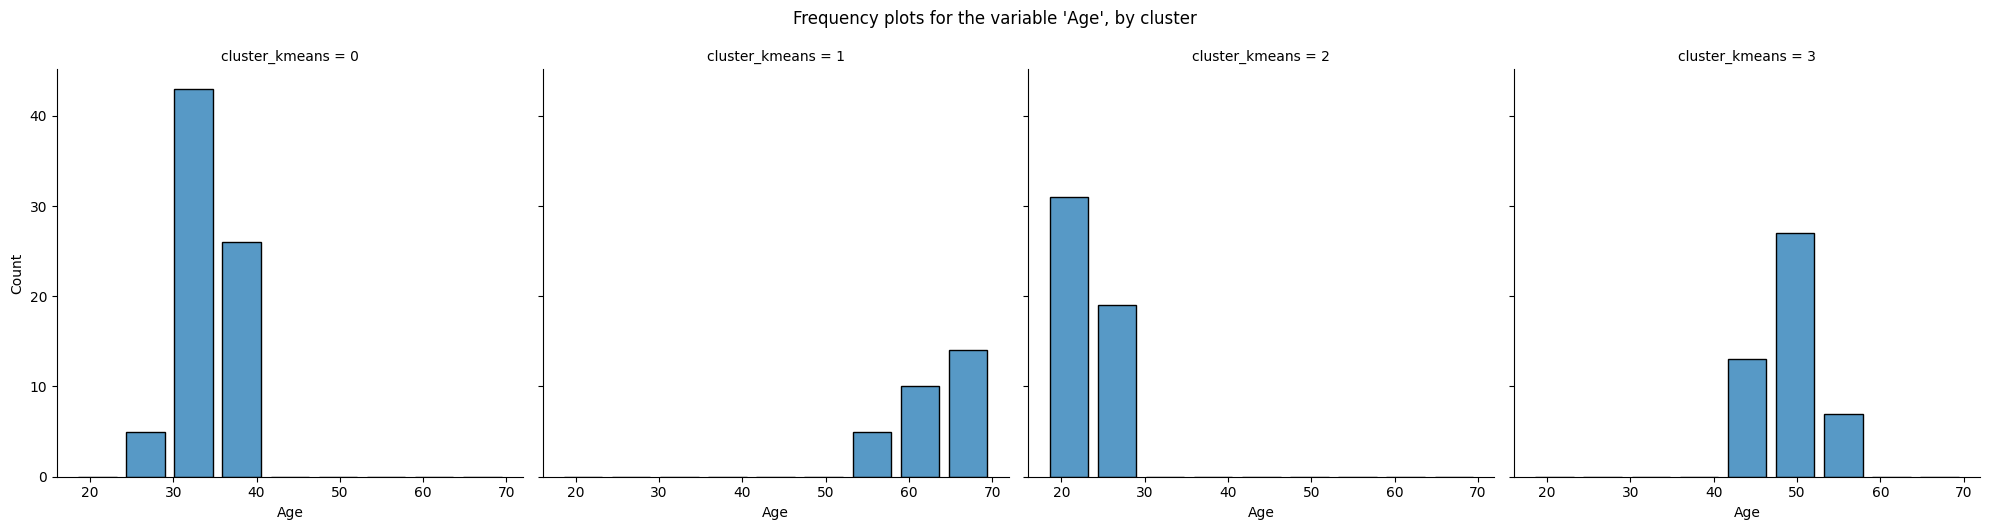

In [25]:
g = sns.displot(data=kmeans_df,
                x='Age',
                col='cluster_kmeans',
                multiple="dodge",
                stat='count',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'Age', by cluster", y=1.05)
plt.show()

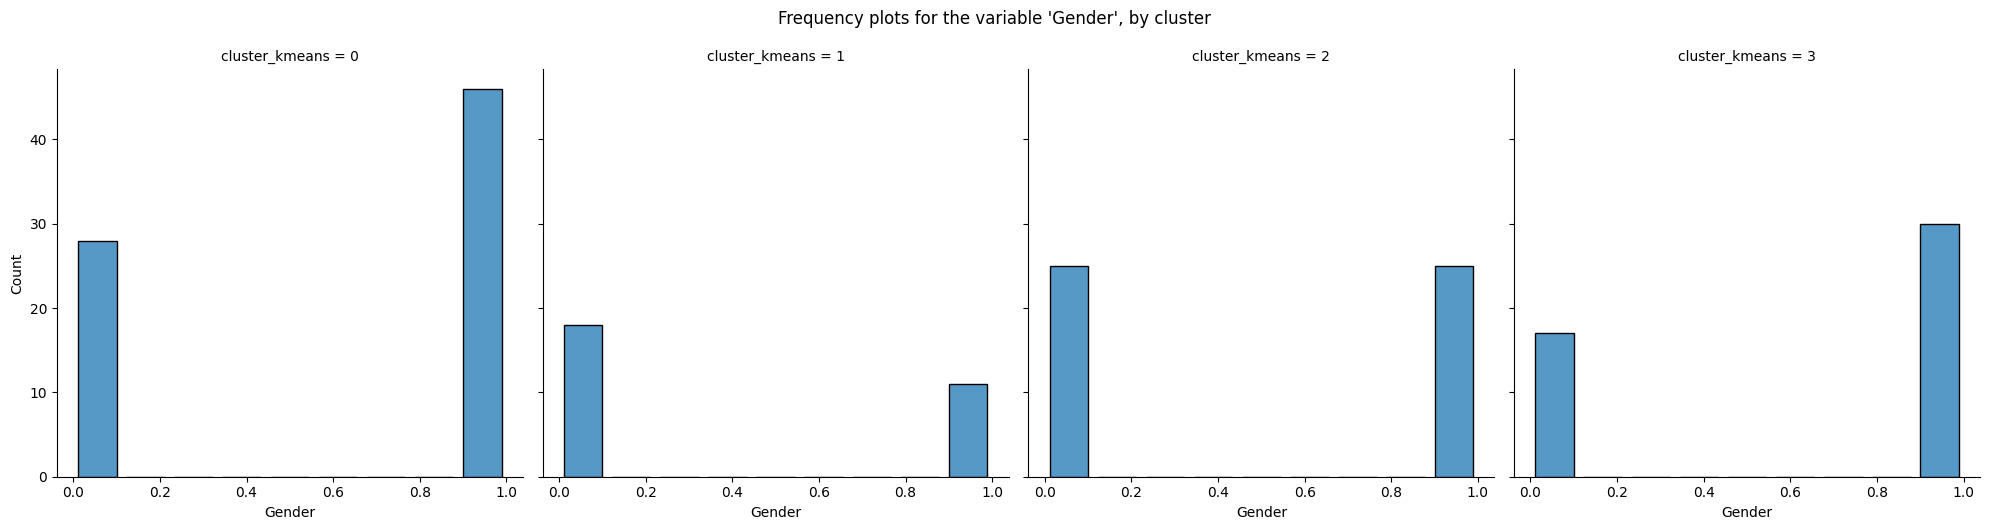

In [26]:
g = sns.displot(data=kmeans_df,
                x='Gender',
                col='cluster_kmeans',
                multiple="dodge",
                stat='count',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'Gender', by cluster", y=1.05)
plt.show()

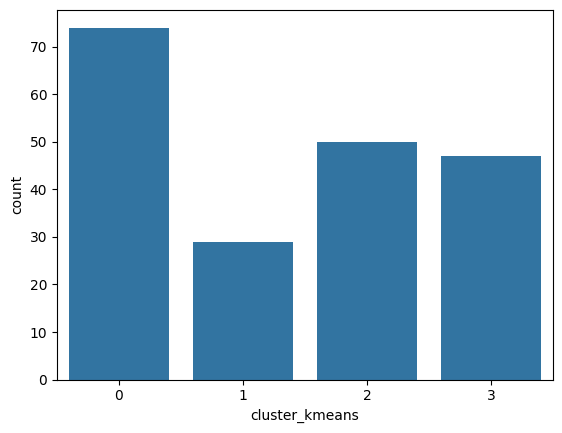

In [27]:
sns.countplot(data=kmeans_df, x='cluster_kmeans')
plt.show()

### Customer Segmentation

| Variable\Cluster                      | 1                       | 2                 | 3                       | 4                 |
|----------------------|-------------------------|-------------------|-------------------------|-------------------|
| `Age`                | 30-40                   | 60-70             | 18-28                   | 45-53             |
| `Gender`                | Female                   | Male             | Both                   | Female             |
| `Annual Income`      | Middle Income           | Middle Income     | Low, Middle Income      | Middle Income     |
| `Spending Class`     | M, H                    | M                 | M, H                    | L, M              |

### Recommendation

| Cluster | Conclusion/Recommendation |
|--|--|
|1 | Fokus pada produk-produk fashion, kecantikan, dan perawatan diri yang menarik bagi wanita berusia 30-40 tahun dengan pendapatan menengah.|
|2 | Fokus pada produk kesehatan, suplemen, dan peralatan kebugaran yang relevan dengan pria berusia 60-70 tahun. <br> Serta memberikan edukasi mengenai produk yang dapat membantu mereka menjaga kesehatan dan kebugaran. |
|3 | Tawarkan produk yang terjangkau namun memiliki desain menarik dan trendi. Berikan semacam diskon khusus pelajar, <br>karena sebagian besar konsumen pada kelompok terdiri dari mereka yang masih berada di usia sekolah/kuliah.|
|4 | Fokus pada produk kesehatan, perawatan keluarga, dan kenyamanan rumah yang relevan dengan wanita berusia 45-53 tahun.|

## Anomaly Detection

Anomaly detection is a technique used to identify data points that are significantly different or “outliers” when compared to the majority of the data in a dataset.

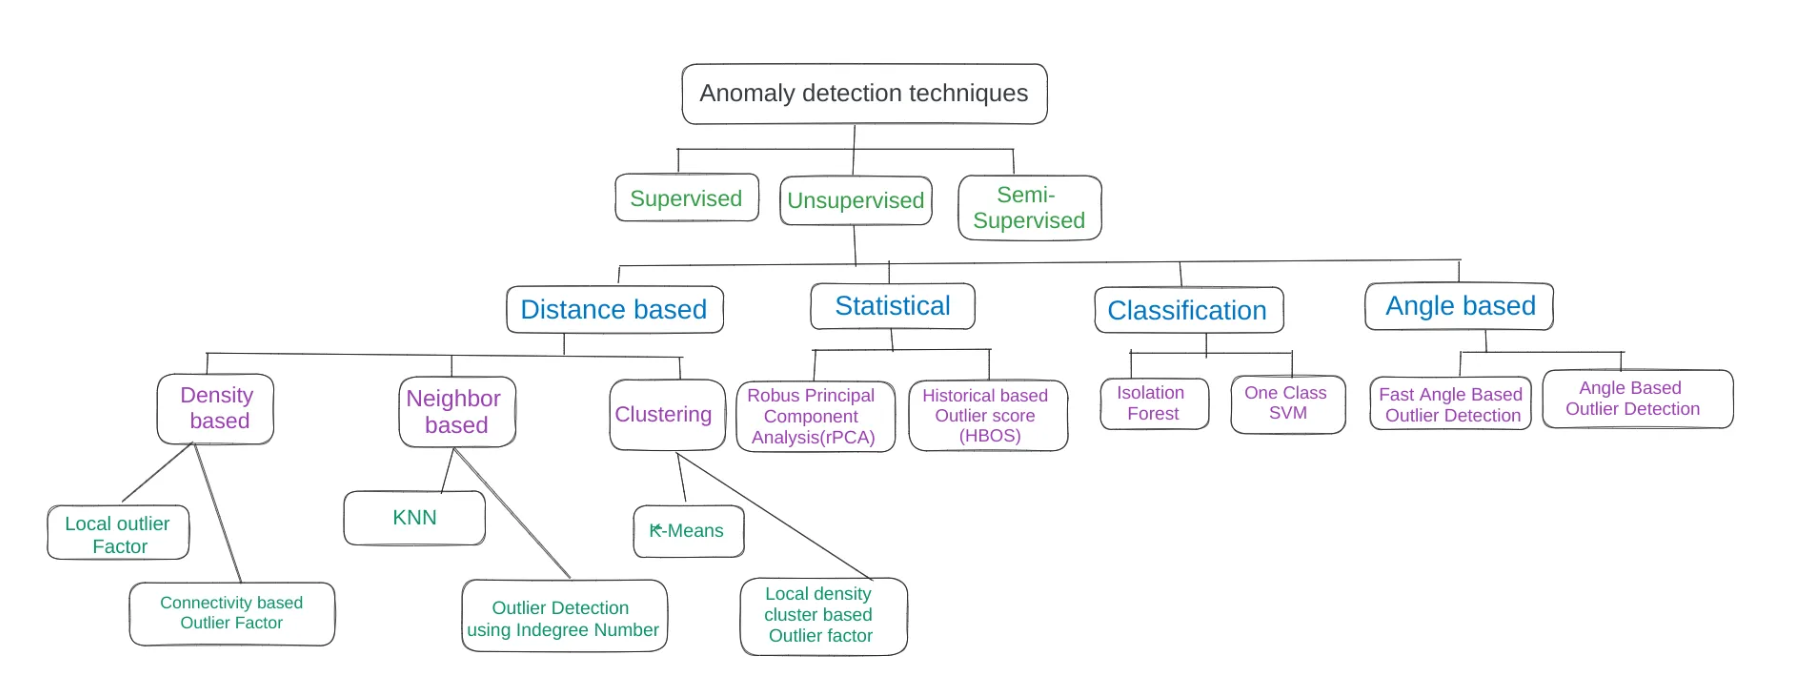

Image source: https://medium.com/simform-engineering/anomaly-detection-with-unsupervised-machine-learning-3bcf4c431aff

### Statistical Method (Gaussian)

In [ ]:
# create synthetic dataset
X, y = make_blobs(n_samples=1000, centers=1, random_state=42, cluster_std=2.0)
anomalies = np.array([[12,11],[11,13],[5,11],[10,15],[4,12],[13,12],[16,14]])
X = np.vstack((X, anomalies))
y = np.hstack((y, np.ones(anomalies.shape[0])))

In [ ]:
def estimate_gaussian(X):
    mu = np.mean(X, axis=0)
    var = np.var(X, axis=0)
    return mu, var

In [ ]:
mu, var = estimate_gaussian(X)
print("Mean of each feature:", mu)
print("Variance of each feature:", var)

In [ ]:
plt.figure(figsize=(18, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot')
plt.show()

In [ ]:
# Membuat objek distribusi normal multivariat (mu dan var memiliki masing-masing 2 data)
rv = multivariate_normal(mu, var)

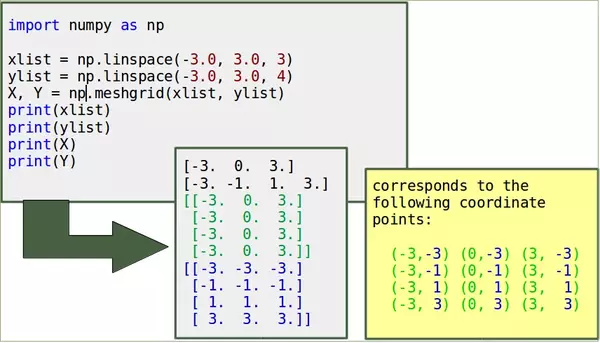

In [ ]:
x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
# Membuat titik-titik grid
X_grid, Y_grid = np.meshgrid(x,y)
# Menggabungkan titik-titik grid menjadi satu array (x,y)
pos = np.dstack((X_grid, Y_grid))

In [ ]:
plt.figure(figsize=(18, 6))
plt.scatter(X[:, 0], X[:, 1])
Z = rv.pdf(pos) # Membuat probability density form pada data
plt.contour(X_grid, Y_grid, Z, levels=10, linewidths=1, colors='purple')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot')

In [ ]:
def select_threshold(y, p):
    best_epsilon = 0
    best_f1 = 0
    F1 = 0

    stepsize = (max(p) - min(p)) / 1000
    # stepsize = (2.0 - 0.1) / 1000
    # stepsize = 1.9 / 1000
    # stepsize = 0.0019
    epsilons = np.arange(min(p), max(p), stepsize)
    # epsilons = np.arange(0.1, 2.0, 0.0019)
    for epsilon in epsilons:
      predictions = (p < epsilon)

      tp = np.sum((predictions == 1)&(y_val == 1))
      fp = np.sum((predictions == 1)&(y_val == 0))
      fn = np.sum((predictions == 0)&(y_val == 1))

      prec = tp / (tp + fp)
      rec = tp / (tp + fn)
      F1 = 2 * prec * rec / (prec + rec)

      if F1 > best_f1:
        best_f1 = F1
        best_epsilon = epsilon
    return best_epsilon, best_f1

In [ ]:
p = multivariate_normal.pdf(X, mu, var)
epsilon, F1 = select_threshold(y, p)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

In [ ]:
pd.Series(p < epsilon).value_counts()

In [ ]:
outliers = p < epsilon
plt.figure(figsize=(9, 5))
plt.scatter(X[:, 0], X[:, 1])
# Z = rv.pdf(pos)
# plt.contour(X_grid, Y_grid, Z, levels=10, linewidths=1, colors='purple')
plt.plot(X[outliers, 0], X[outliers, 1],'ro', markersize=12, markeredgewidth=1, markerfacecolor='none')
# plt.tight_layout()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomalies Detection between Feature 1 and 2')
plt.show()

In [ ]:
normal_data = X[~outliers] # ~ bitwise operator for 'NOT'
plt.figure(figsize=(9, 5))
plt.scatter(normal_data[:, 0], normal_data[:, 1])
# Z = rv.pdf(pos)
# plt.contour(X_grid, Y_grid, Z, levels=10, linewidths=1, colors='purple')
# plt.plot(X[outliers, 0], X[outliers, 1],'go', markersize=12, markeredgewidth=1, markerfacecolor='none')
# plt.tight_layout()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data without Anomaly')
plt.show()

### DBSCAN

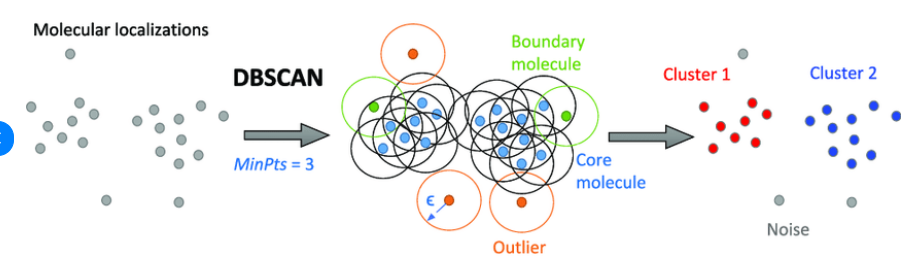

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) merupakan algoritma yang berguna untuk menemukan kelompok (klaster) dalam data yang memiliki kepadatan tinggi yang dipisahkan oleh area dengan kepadatan rendah

Konsep Utama dalam DBSCAN
- Epsilon (ε): Radius atau jarak maksimal antara dua titik untuk dianggap sebagai bagian dari klaster yang sama.
- MinPts: Jumlah minimal titik dalam radius ε yang diperlukan untuk mempertimbangkan titik sebagai titik inti (core point).
- Titik Inti (Core Point): Titik yang memiliki setidaknya MinPts titik dalam radius ε.
- Titik Tepi (Border Point): Titik yang bukan titik inti tetapi berada dalam radius ε dari titik inti.
- Noise: Titik yang tidak memenuhi kriteria sebagai titik inti atau titik tepi, dianggap sebagai outlier.


Image source: medium.com/@sachinsoni600517

In [ ]:
# create synthetic dataset
X, y = make_blobs(n_samples=1000, centers=2, random_state=42, cluster_std=2.0)
anomalies = np.array([[12,11],[11,13],[5,11],[10,15],[4,12],[13,12],[16,14]])
X = np.vstack((X, anomalies))
y = np.hstack((y, np.ones(anomalies.shape[0])))

In [ ]:
from sklearn.preprocessing import StandardScaler
# Data normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
k = 4 # ≥ 2 * n features
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
# mencari jarak dan indeks tetangga terdekat untuk setiap titik data
distances, indices = neighbors_fit.kneighbors(X_scaled)

DBSCAN mendefinisikan core point sebagai titik data yang memiliki setidaknya sejumlah minimum titik data lain (MinPts) dalam jarak epsilon. Tetangga terdekat pertama dari setiap titik data selalu merupakan titik data itu sendiri, dengan jarak 0. Ini tidak berguna untuk menentukan core point.<br>
**Singkatnya**: Memilih kolom kedua membantu kita mengidentifikasi core point dan menentukan nilai epsilon yang optimal untuk DBSCAN.

In [ ]:
# mengurutkan tetangga terdekat
distances = np.sort(distances[:,1], axis=0)
plt.plot(distances)
plt.axhline(0.15, color='r', linestyle='-', label='Threshold = 0.15')
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title('k-NN Distance Plot for Determining Epsilon')
plt.legend()
plt.show()

In [ ]:
# Menerapkan DBSCAN
epsilon = 0.15  # Radius
min_samples = 4  # MinPts
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)
# Menandai anomali ke data asli
anomalies = X[labels == -1]

In [ ]:
anomalies

In [ ]:
# Visualize the anomalies
plt.figure(figsize=(18, 8))
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.plot(anomalies[:,0], anomalies[:, 1],'ro', markersize=12, markeredgewidth=1, markerfacecolor='none')
plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Recommenders

**Recommenders** adalah algoritma atau metode yang bertujuan untuk menyarankan item atau konten kepada pengguna berdasarkan berbagai jenis informasi.

Contoh:

| Movie | A | B | C | D |
|- | - | - | -|-|
| Love at last | 5 | 5|0|0|
| Romance Forever | 5 | ? | ? | 0 |
| Cute Puppies | ? |4| 0 | ? |
| Car Chases |  0 |0|5|4|
| Swords vs Karate | 0|0|5|?|

Notes:

|General <br />  Notation  | Description| Python (if any) |
|-|------------------------------------------------------------|-|
| $r(i,j)$     | scalar; = 1  if user j rated movie i  = 0  otherwise             ||
| $y(i,j)$     | scalar; = rating given by user j on movie  i    (if r(i,j) = 1 is defined) ||
|$\mathbf{w}^{(j)}$ | vector; parameters for user j ||
|$b^{(j)}$     |  scalar; parameter for user j ||
| $\mathbf{x}^{(i)}$ |   vector; feature ratings for movie i        ||     
| $n_u$        | number of users |num_users|
| $n_m$        | number of movies | num_movies |
| $n$          | number of features | num_features                    |
| $\mathbf{X}$ |  matrix of vectors $\mathbf{x}^{(i)}$         | X |
| $\mathbf{W}$ |  matrix of vectors $\mathbf{w}^{(j)}$         | W |
| $\mathbf{b}$ |  vector of bias parameters $b^{(j)}$ | b |
| $\mathbf{R}$ | matrix of elements $r(i,j)$                    | R |


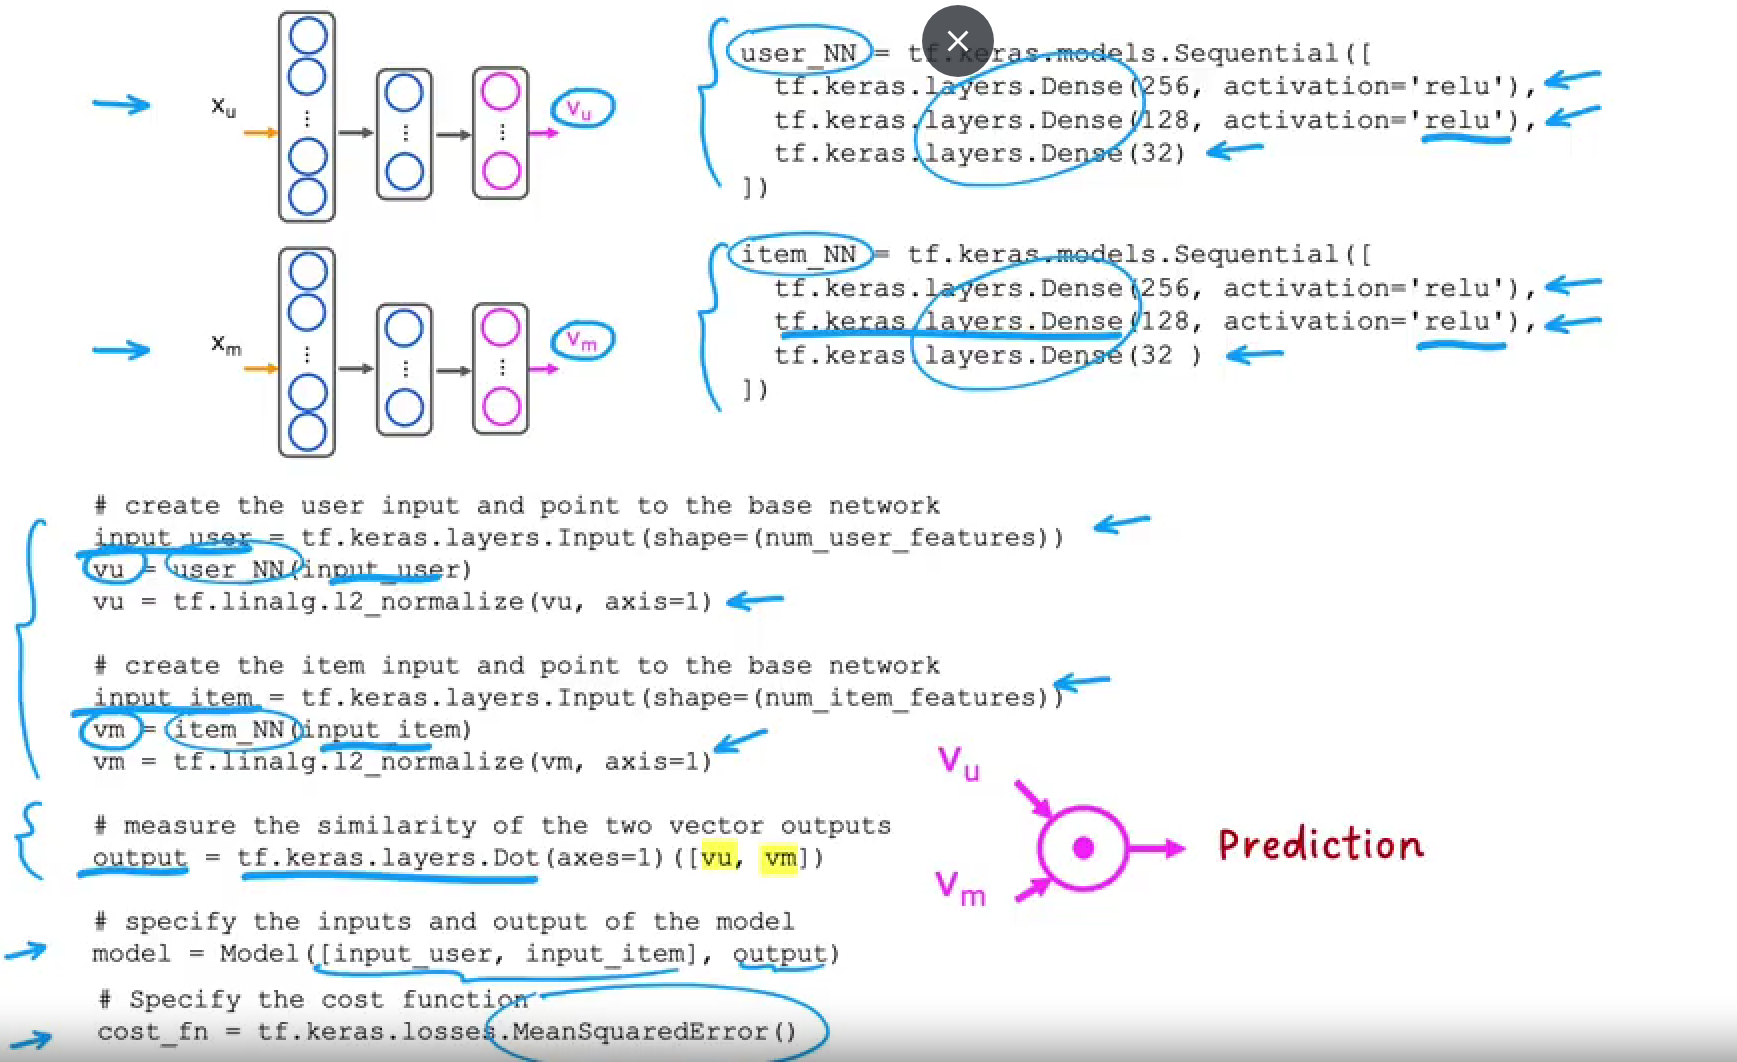

### Data Preparation

In [5]:
book_df = pd.read_csv('C:/Users/Azriel Akbar/Documents/Courses/Coursera/ML Specialization/Unsupervised, Recommenders, Reinforcement/book-recommend/Books.csv')
rating_df = pd.read_csv('C:/Users/Azriel Akbar/Documents/Courses/Coursera/ML Specialization/Unsupervised, Recommenders, Reinforcement/book-recommend/Ratings.csv')
user_df = pd.read_csv('C:/Users/Azriel Akbar/Documents/Courses/Coursera/ML Specialization/Unsupervised, Recommenders, Reinforcement/book-recommend/Users.csv')

In [6]:
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
columns = ['Book-Title', 'Book-Author', 'Publisher']
for col in columns:
    book_df[col] = book_df[col].str.replace('amp;','')
    book_df[col] = book_df[col].str.replace('&lt;','')
    book_df[col] = book_df[col].str.replace('&gt;','')
    book_df[col] = book_df[col].str.replace('&quot;','')

In [5]:
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
book_df.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [8]:
book_df.dropna(inplace=True)

In [8]:
book_df[book_df.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [9]:
book_df['Year-Of-Publication'] = pd.to_numeric(book_df['Year-Of-Publication'])

In [10]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
rating_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [12]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
rating_df[rating_df.duplicated()]

,User-ID,ISBN,Book-Rating


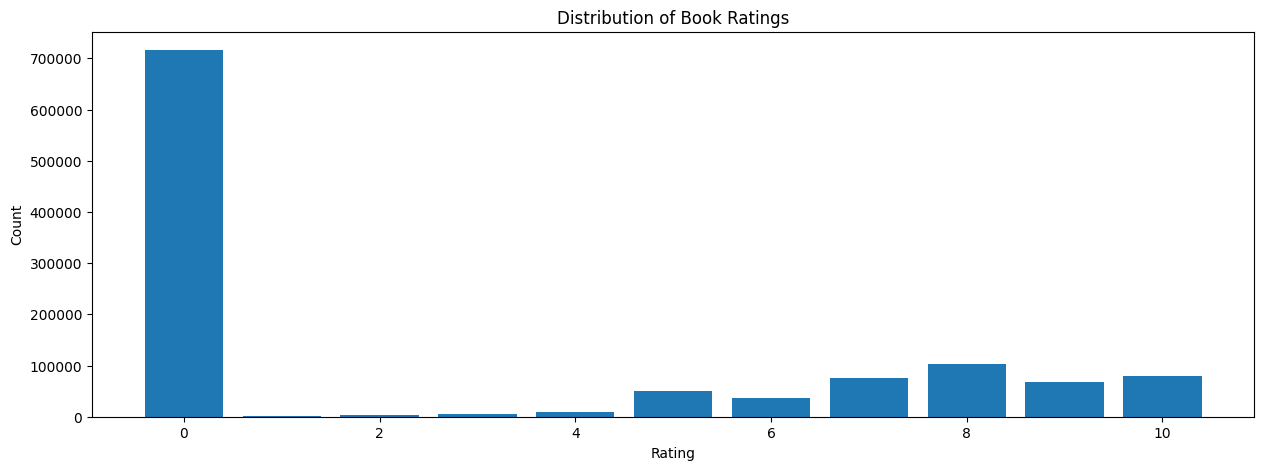

In [6]:
plt.figure(figsize=(15, 5))
plt.bar(rating_df['Book-Rating'].value_counts().index, rating_df['Book-Rating'].value_counts())
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Book Ratings')
plt.show()

In [15]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
user_df.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


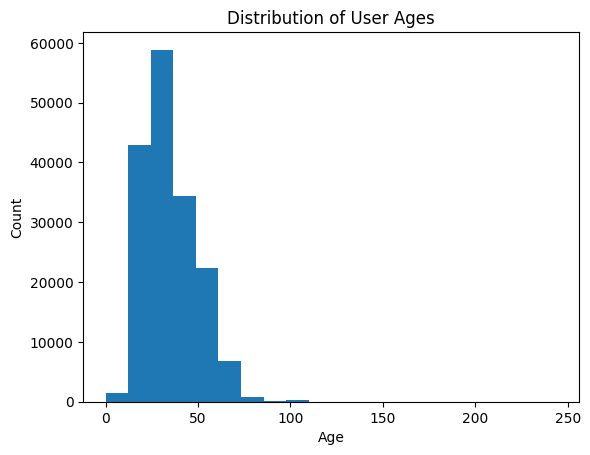

In [17]:
plt.hist(user_df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of User Ages')
plt.show()

In [18]:
user_df['Age'].describe([0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1])

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
1%,13.000000
10%,19.000000
20%,23.000000
30%,26.000000
40%,29.000000
50%,32.000000


In [10]:
user_df['Age'] = user_df['Age'].fillna(user_df['Age'].median())

In [11]:
iqr = np.quantile(user_df['Age'], 0.75) - np.quantile(user_df['Age'], 0.25)
lower_bound = np.quantile(user_df['Age'], 0.25) - 1.5 * iqr
upper_bound = np.quantile(user_df['Age'], 0.75) + 1.5 * iqr
print(lower_bound, upper_bound)

20.0 44.0


In [12]:
user_df = user_df[user_df['Age'].between(12, 100)]

<Axes: >

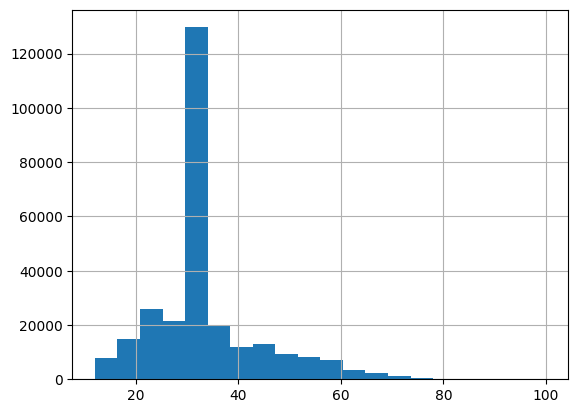

In [12]:
user_df.Age.hist(bins=20)

In [13]:
user_df['Location'] = user_df['Location'].str.upper()

In [14]:
for col in ['City', 'State', 'Country']:
    user_df['City'] = user_df['Location'].str.split(',').str[0]
    user_df['State'] = user_df['Location'].str.split(',').str[1]
    user_df['Country'] = user_df['Location'].str.split(',').str[2]

In [15]:
user_df.drop(columns='Location', inplace=True)

In [16]:
print(book_df.shape)
print(rating_df.shape)
print(user_df.shape)

(271353, 8)
(1149780, 3)
(277218, 5)


In [17]:
# merge dataframe
book_ratings = rating_df.merge(book_df,on='ISBN')

In [18]:
book_ratings = book_ratings.iloc[:,:9]
book_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...
1031123,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research & Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031124,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031125,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031126,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [19]:
num_ratings = book_ratings.groupby('Book-Title').count()['User-ID'].reset_index()
num_ratings.rename(columns={'User-ID':'num_ratings'}, inplace=True)

In [20]:
avg_ratings = book_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_ratings.rename(columns={'Book-Rating':'avg_ratings'}, inplace=True)

In [21]:
avg_ratings = avg_ratings.merge(num_ratings, on='Book-Title')

In [22]:
avg_ratings.rename(columns={'num_ratings_y':'num_ratings'}, inplace=True)
# avg_ratings.drop(columns='num_ratings_x', inplace=True)

In [23]:
avg_ratings

,Book-Title,avg_ratings,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000,4
1,Always Have Popsicles,0.000000,1
2,Apple Magic (The Collector's series),0.000000,1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000,1
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000,1
...,...,...,...
241060,Ã?Â?lpiraten.,0.000000,2
241061,Ã?Â?rger mit Produkt X. Roman.,5.250000,4
241062,Ã?Â?sterlich leben.,7.000000,1
241063,Ã?Â?stlich der Berge.,2.666667,3


In [24]:
popular_books = avg_ratings[avg_ratings['num_ratings'] >= 50].sort_values(by='num_ratings', ascending=False)

In [25]:
popular_books = popular_books.merge(book_ratings, on='Book-Title').drop_duplicates('Book-Title')\
[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_ratings']]
popular_books.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Wild Animus,Rich Shapero,http://images.amazon.com/images/P/0971880107.0...,2502,1.019584
2502,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,1295,4.468726
3797,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,898,4.642539
4695,A Painted House,JOHN GRISHAM,http://images.amazon.com/images/P/038550120X.0...,838,3.231504
5533,The Nanny Diaries: A Novel,Emma McLaughlin,http://images.amazon.com/images/P/0312278586.0...,828,3.530193


In [26]:
# membuat df users yang sudah me-rating >= 50 buku
x = book_ratings.groupby('User-ID').count()['Book-Rating'] >= 50
users_rates50 = x[x].index
users_rates50

Index([   243,    254,    507,    638,    643,    741,    882,    929,   1025,
         1211,
       ...
       277928, 277965, 278026, 278137, 278144, 278188, 278418, 278582, 278633,
       278843],
      dtype='int64', name='User-ID', length=3058)

In [29]:
filtered_ratings = book_ratings[book_ratings['User-ID'].isin(users_rates50)]

In [30]:
# membuat df buku yang sudah di-rating lebih atau sama dengan 50 kali
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [32]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]
final_ratings.drop(columns='Image-URL-S',inplace=True)

### Pivot Table for Collaborative Filtering

In [33]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0, inplace=True)
pt

User-ID,243,254,507,638,643,741,882,929,1025,1211,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity
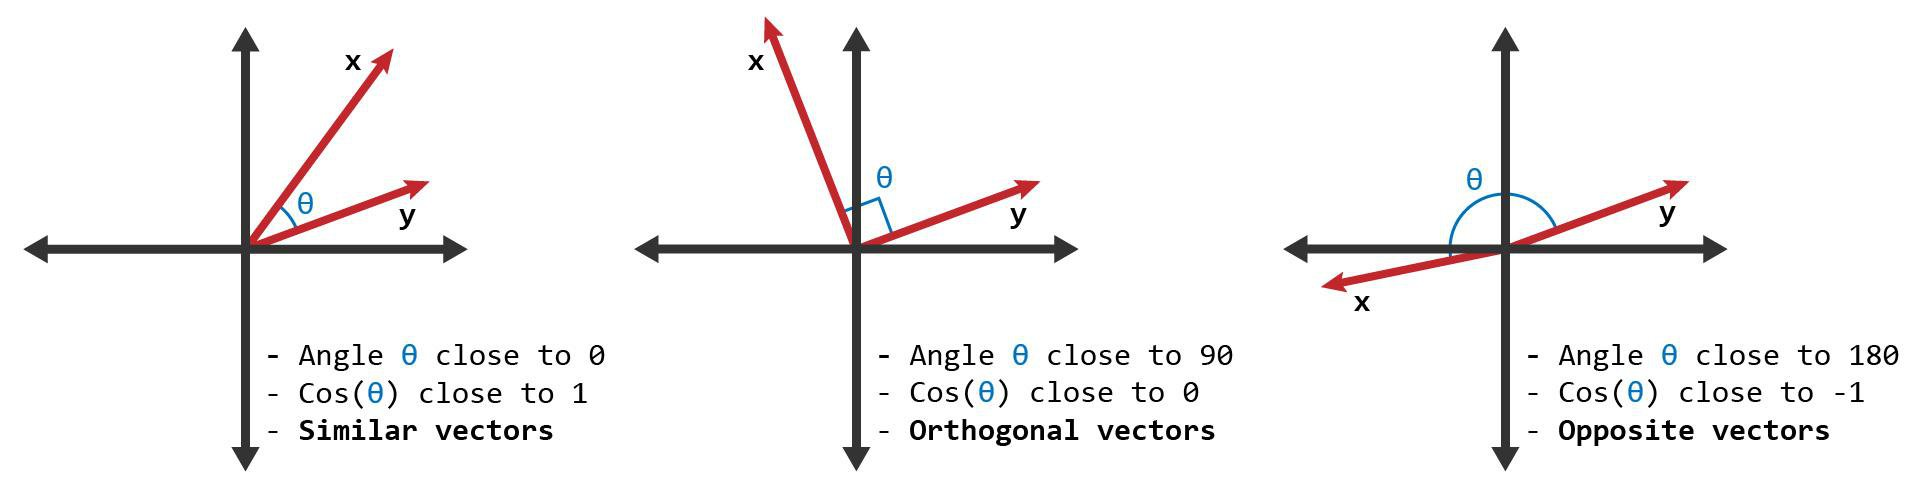

**Bagaimana Cara Kerjanya?**

- Vektor dan Sudut:
Bayangkan dua vektor di ruang dua dimensi atau lebih. Jika dua vektor tersebut mengarah ke arah yang sama, sudut antara keduanya kecil atau bahkan nol, yang menghasilkan nilai cosine similarity mendekati 1 (atau maksimal). Sebaliknya, jika dua vektor mengarah ke arah yang berlawanan, sudut antara keduanya besar (mendekati 180 derajat), dan cosine similarity mendekati -1 (atau minimal). Jika vektor tidak memiliki hubungan yang jelas, cosine similarity-nya akan mendekati 0.

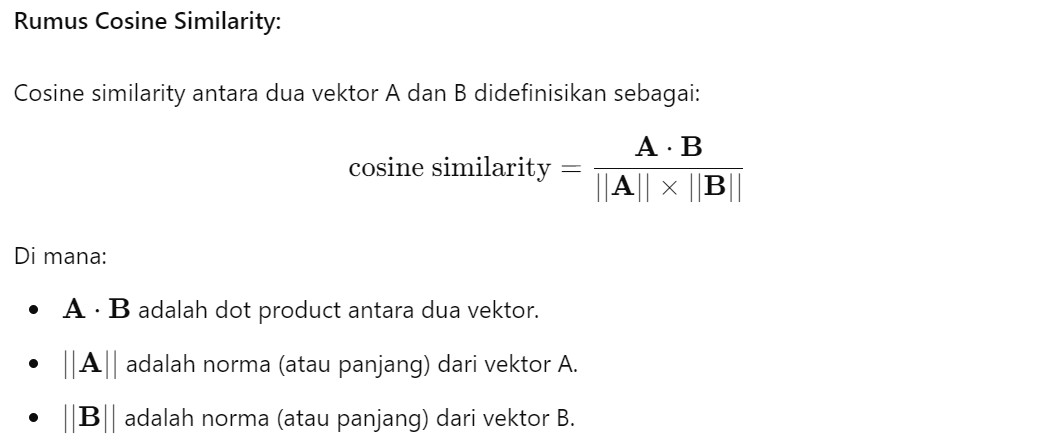
OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com/c/ecd7e92b-4172-4412-af5d-6878baaa5628

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(pt)
user_similarity_df = pd.DataFrame(user_similarity, index=pt.index, columns=pt.index)

In [55]:
user_similarity_df.columns.tolist()

['1984',
 '1st to Die: A Novel',
 '2010: Odyssey Two',
 '204 Rosewood Lane',
 '24 Hours',
 '2nd Chance',
 '4 Blondes',
 '84 Charing Cross Road',
 'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
 'A Bend in the Road',
 'A Case of Need',
 'A Child Called \\It\\": One Child\'s Courage to Survive"',
 'A Civil Action',
 'A Confederacy of Dunces (Evergreen Book)',
 'A Cry In The Night',
 'A Dangerous Fortune',
 'A Darkness More Than Night',
 'A Day Late and a Dollar Short',
 'A Density of Souls',
 'A Fine Balance',
 'A Girl Named Zippy: Growing Up Small in Mooreland Indiana (Today Show Book Club #3)',
 'A Great Deliverance',
 'A Heartbreaking Work of Staggering Genius',
 'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
 'A Knight in Shining Armor',
 'A Lesson Before Dying (Vintage Contemporaries (Paperback))',
 'A Light in the Window (The Mitford Years)',
 'A M

In [36]:
def display_images(df):
    html = '<table>'
    html += '<tr><th>Book Title</th><th>Book Author</th><th>Cosine Similarity Value</th><th>Image</th><th>ISBN</th><th>Publisher</th></tr>'
    for _, row in df.iterrows():
        html += f'<tr><td>{row["Book-Title"]}</td><td>{row["Book-Author"]}</td><td>{row["Cosine Similarity Value"]}\
        </td><td><img src="{row["Image-URL-M"]}" width="100"/></td><td>{row["ISBN"]}</td><td>{row["Publisher"]}</td></tr>'
    html += '</table>'
    return HTML(html)

In [59]:
def recommend_book(book_title):
    similar_books = user_similarity_df[book_title].sort_values(ascending=False)
    df = pd.DataFrame(similar_books.iloc[1:11].reset_index().rename(columns={book_title:'Cosine Similarity Value'}))
    df['Cosine Similarity Value'] = round(df['Cosine Similarity Value'],4)
    df = df.merge(final_ratings, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Cosine Similarity Value',\
                                                                                 'Image-URL-M','ISBN','Publisher']]
    print(f'Several books similar to {book_title} you might like:')
    return display_images(df)

In [60]:
recommend_book("Zoya")

Several books similar to Zoya you might like:


Book Title,Book Author,Cosine Similarity Value,Image,ISBN,Publisher
Jewels,Danielle Steel,0.3928,,0385304900,Delacorte Press
Fine Things,Danielle Steel,0.3895,,0440200563,Dell
Mixed Blessings,Danielle Steel,0.358,,0385299109,Delacorte Press
The Ranch,DANIELLE STEEL,0.3466,,0440224780,Dell
Kaleidoscope,Danielle Steel,0.3407,,0440201926,Dell
Thurston House,Danielle Steel,0.3402,,0440185327,Dell
No Greater Love,Danielle Steel,0.3373,,0385299095,Delacorte Press
Wings,DANIELLE STEEL,0.3358,,0385306059,Delacorte Press
Secrets,DANIELLE STEEL,0.333,,0440176484,Dell
Heartbeat,Danielle Steel,0.3223,,0440211891,Dell


## Reinforcement